In [2]:
%config Completer.use_jedi =False

In [3]:
from sklearn.datasets import make_regression

In [589]:
import numpy as np
import seaborn as sns

In [590]:
x = np.linspace(1,20,20)
e = np.random.randint(-9,8,20)

In [591]:
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

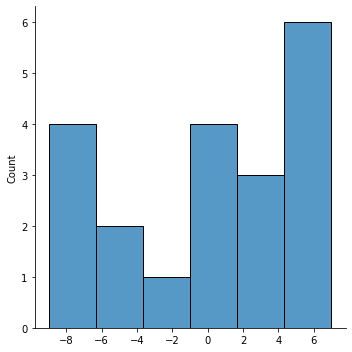

In [592]:
sns.displot(e)

In [593]:
y =  500*x + 1100 +e

In [594]:
y

array([ 1593.,  2105.,  2599.,  3099.,  3601.,  4102.,  4604.,  5091.,
        5605.,  6107.,  6597.,  7091.,  7607.,  8093.,  8595.,  9105.,
        9600., 10107., 10604., 11094.])

E:\SoftwareBinaries\miniconda\envs\test_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

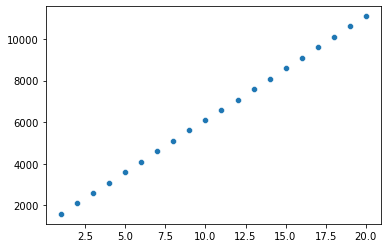

In [595]:
sns.scatterplot(x,y)

In [614]:
from sklearn.linear_model import LinearRegression, LogisticRegressionCV


In [ ]:
LogisticRegressionCV

In [608]:
lr = LinearRegression(fit_intercept= True, normalize=False)

In [609]:
x=x.reshape(-1,1)

In [610]:
lr.fit(x,y)

LinearRegression()

In [611]:
lr.coef_

array([500.05037594])

In [612]:
lr.intercept_

1099.4210526315783

In [613]:
lr.score(x,y)

0.9999964562911422

### Manual

In [554]:
x_mean = x.mean()
y_mean = y.mean()

In [555]:
# lets take first regression line as  y = y_mean, so m would be 0 and c can be calculated putting values in equation.

m = 0 
# y = m*x + c ( apply value of m and mean of x and y )
 
# y_mean = 0*x_mean + c

c = y_mean
c


6348.85

In [556]:
# so c and m both are known at initial stage
w = [m,c ]

In [557]:

w

[0, 6348.85]

In [562]:
y,x

(array([ 1595.,  2103.,  2598.,  3101.,  3597.,  4096.,  4595.,  5102.,
         5594.,  6104.,  6607.,  7100.,  7600.,  8103.,  8596.,  9101.,
         9594., 10100., 10593., 11098.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20.]))

In [563]:
def y_hat(x,w):
    return w[0]*x + w[1]

In [564]:
y_hat(x,w), w

(array([6348.85, 6348.85, 6348.85, 6348.85, 6348.85, 6348.85, 6348.85,
        6348.85, 6348.85, 6348.85, 6348.85, 6348.85, 6348.85, 6348.85,
        6348.85, 6348.85, 6348.85, 6348.85, 6348.85, 6348.85]),
 [0, 6348.85])

In [565]:
def cost(x ,y,w):
    y_hat_v = y_hat(x,w)
    return (0.5/len(y))*sum([(y_v-y_hat_v[i])**2 for i,y_v in enumerate(y)])

In [566]:
cost(x,y,w)

4155469.5637500007

In [579]:
def grad(x ,y,w):
    g = [0]*2
    g[0] = (1/len(y)) * sum((y_hat(x,w).ravel() - y)* x.ravel())
    g[1] = (1/len(y)) * sum(y_hat(x,w) - y) 
    return g

In [580]:
(y_hat(x,w).ravel() - y)

array([ 4753.85,  4245.85,  3750.85,  3247.85,  2751.85,  2252.85,
        1753.85,  1246.85,   754.85,   244.85,  -258.15,  -751.15,
       -1251.15, -1754.15, -2247.15, -2752.15, -3245.15, -3751.15,
       -4244.15, -4749.15])

In [568]:
grad(x,y,w)

[-16623.425, -6.366462912410498e-13]

In [569]:
def descent(w_new,w_old,lr):
    
    print(w_old)
#     print(cost(x,y,w_old))
    j=0
    while True:
        w_old = w_new
        w0 = w_old[0] - lr*grad(x,y,w_old)[0]
        w1 = w_old[1] - lr*grad(x,y,w_old)[1] 
        w_new= [w0,w1]
#         print(f'new weights: {w_new}')
        if j%300 == 0:
        
            print(f'loss is {cost(x,y,w_new)}')
        if j > 4000:
            return w_new
        j+=1

In [570]:
grad(x,y,w)

[-16623.425, -6.366462912410498e-13]

In [571]:
12 % 7

5

In [572]:
descent(w,w,0.01)

[0, 6348.85]
loss is 3374813.9828359853
loss is 798528.2486149394
loss is 200010.9911741796
loss is 50101.60727498854
loss is 12554.112859993773
loss is 3149.669321008106
loss is 794.1577307953274
loss is 204.1775976140534
loss is 56.40648963272324
loss is 19.39456477978429
loss is 10.124264245176727
loss is 7.802351176797697
loss is 7.220786396131714
loss is 7.075123064149569


[499.91500239888217, 1099.860807934348]

In [225]:
cost(x,y,w)
# (1/len(y)) *sum(y_hat(x,w) - y) * x

array([9.30135801e+43, 1.07898498e+44, 1.23887708e+44, 1.40981210e+44,
       1.59179005e+44, 1.78481092e+44, 1.98887471e+44, 2.20398142e+44,
       2.43013106e+44, 2.66732361e+44, 2.91555909e+44, 3.17483749e+44,
       3.44515882e+44, 3.72652306e+44, 4.01893023e+44, 4.32238032e+44,
       4.63687334e+44, 4.96240927e+44, 5.29898813e+44, 5.64660991e+44])

In [229]:
([(i-y_hat(x,w))**2 for i in y])


array([11.,  7., 13., 30., 32., 32., 40., 49., 40., 52., 51., 63., 72.,
       78., 82., 91., 90., 87., 91., 98.])

In [230]:
y_hat(x,w)

array([1.36391774e+22, 1.46900305e+22, 1.57408836e+22, 1.67917367e+22,
       1.78425898e+22, 1.88934429e+22, 1.99442960e+22, 2.09951491e+22,
       2.20460022e+22, 2.30968553e+22, 2.41477083e+22, 2.51985614e+22,
       2.62494145e+22, 2.73002676e+22, 2.83511207e+22, 2.94019738e+22,
       3.04528269e+22, 3.15036800e+22, 3.25545331e+22, 3.36053862e+22])

In [112]:
q.shape, r.shape

((9, 6), (6, 6))

In [113]:
A = np.array([[0, 1], [1, 1], [1, 1], [2, 1]])

In [114]:
A

array([[0, 1],
       [1, 1],
       [1, 1],
       [2, 1]])

In [115]:
b = np.array([1, 0, 2, 1])

In [116]:
b

array([1, 0, 2, 1])

In [119]:
q, r = np.linalg.qr(A)

In [120]:
q

array([[ 0.        ,  0.8660254 ],
       [-0.40824829,  0.28867513],
       [-0.40824829,  0.28867513],
       [-0.81649658, -0.28867513]])

In [126]:
q.T

array([[ 0.        , -0.40824829, -0.40824829, -0.81649658],
       [ 0.8660254 ,  0.28867513,  0.28867513, -0.28867513]])

In [121]:
r

array([[-2.44948974, -1.63299316],
       [ 0.        ,  1.15470054]])

In [122]:
p = np.dot(q.T, b)

In [123]:
p

array([-1.63299316,  1.15470054])

In [125]:
np.dot(np.linalg.inv(r), p)

array([2.22044605e-16, 1.00000000e+00])

In [124]:
np.linalg.inv(r)

array([[-0.40824829, -0.57735027],
       [ 0.        ,  0.8660254 ]])

In [129]:
np.linalg.det(np.linalg.inv(r))

-0.35355339059327356

In [131]:
a = np.array([[1,0,1],[3,-2,-1],[3,0,0]])

In [132]:
np.linalg.det(a)

6.0

In [577]:
np.array([[3],[4], [8]]) * np.array([1,2])

array([[ 3,  6],
       [ 4,  8],
       [ 8, 16]])

In [576]:
np.array([3,4]) * np.array([1,2])

array([3, 8])

In [578]:
np.array([1,2]) *np.array([[3],[4], [8]])

array([[ 3,  6],
       [ 4,  8],
       [ 8, 16]])

In [586]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=1).fit_transform(X)
X_embedded.shape

(4, 1)

In [587]:
X.shape

(4, 3)

In [588]:
X_embedded

array([[-316.65958  ],
       [ 298.87155  ],
       [   1.9627494],
       [ 617.4943   ]], dtype=float32)